In [61]:
################################################################################
################################################################################
import numpy as np
import tables
from keras import optimizers
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint#, ReduceLROnPlateau, ModelCheckpoint
from keras import models, layers, optimizers
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.applications import VGG16
from keras import models, layers
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,auc
from scipy import interp
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from matplotlib import rcParams
################################################################################
################################################################################


-----------------
-----------------

# Enough Data - Multi-label

In [ ]:
hdf5_file = tables.open_file('Generated_Files/4d_enough_train_data.h5', mode='r')
X_train = np.array(hdf5_file.root.X_train)
y_train = np.array(hdf5_file.root.y_train)
X_test = np.array(hdf5_file.root.X_test)
y_test = np.array(hdf5_file.root.y_test)
hdf5_file.close()

In [11]:
# Load parameters
################################################################################
colors = 4
pixels = 512
single_label = ['softmax','categorical_crossentropy'] # multi_label = ['sigmoid','binary_crossentropy']
multi_label = ['sigmoid','binary_crossentropy']
activation = multi_label[0]
loss = multi_label[1]

optimizer = optimizers.Adam(lr = .0001) # MOMENTUM OF .09
metrics = 'accuracy'
batch_size=50
epochs=100

num_classes = 15
input_shape_img = (pixels, pixels, colors)
################################################################################

In [11]:
# BEST
################################################################################
# Name the model
model_S1 = Sequential()
model3 = model_S1

model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape_img)) 
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(GlobalAveragePooling2D())
model3.add(Dense(num_classes, activation=activation))


model3.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])
      
model3_file = 'Models/2categories/weights.{epoch:02d}-{val_loss:.2f}.hdf5'

checkpoint = ModelCheckpoint(model3_file, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

# model3.summary()
                            
history3 = model3.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=batch_size),
                              steps_per_epoch=len(X_train)/batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test),
                              callbacks = [early_stop, checkpoint]
                             )

Epoch 1/100
384/383 [==============================] - 281s 732ms/step - loss: 0.3370 - acc: 0.8724 - val_loss: 0.2832 - val_acc: 0.8995

Epoch 00001: val_loss improved from inf to 0.28320, saving model to Models/2categories/weights.01-0.28.hdf5
Epoch 2/100
384/383 [==============================] - 280s 729ms/step - loss: 0.2788 - acc: 0.8978 - val_loss: 0.2742 - val_acc: 0.8986

Epoch 00002: val_loss improved from 0.28320 to 0.27423, saving model to Models/2categories/weights.02-0.27.hdf5
Epoch 3/100
384/383 [==============================] - 280s 729ms/step - loss: 0.2714 - acc: 0.9039 - val_loss: 0.2668 - val_acc: 0.9042

Epoch 00003: val_loss improved from 0.27423 to 0.26685, saving model to Models/2categories/weights.03-0.27.hdf5
Epoch 4/100
384/383 [==============================] - 280s 728ms/step - loss: 0.2656 - acc: 0.9066 - val_loss: 0.2634 - val_acc: 0.9080

Epoch 00004: val_loss improved from 0.26685 to 0.26343, saving model to Models/2categories/weights.04-0.26.hdf5
Epoc

384/383 [==============================] - 280s 728ms/step - loss: 0.1755 - acc: 0.9352 - val_loss: 0.1804 - val_acc: 0.9353

Epoch 00074: val_loss did not improve from 0.17935
Epoch 75/100
384/383 [==============================] - 281s 731ms/step - loss: 0.1748 - acc: 0.9359 - val_loss: 0.1825 - val_acc: 0.9339

Epoch 00075: val_loss did not improve from 0.17935
Epoch 76/100
384/383 [==============================] - 276s 719ms/step - loss: 0.1746 - acc: 0.9360 - val_loss: 0.1782 - val_acc: 0.9351

Epoch 00076: val_loss improved from 0.17935 to 0.17822, saving model to Models/2categories/weights.76-0.18.hdf5
Epoch 77/100
384/383 [==============================] - 279s 726ms/step - loss: 0.1739 - acc: 0.9364 - val_loss: 0.1833 - val_acc: 0.9345

Epoch 00077: val_loss did not improve from 0.17822
Epoch 78/100
384/383 [==============================] - 282s 733ms/step - loss: 0.1731 - acc: 0.9366 - val_loss: 0.1796 - val_acc: 0.9352

Epoch 00078: val_loss did not improve from 0.17822
Ep

In [4]:
# pickle.dump(model3, open( "Models/15categories/model3_scratch_4d_gmf_100e_bs100.pkl", "wb" ) )

model3 = pickle.load( open( "Models/15categories/model3_scratch_4d_gmf_100e.pkl", "rb" ) )

In [5]:
hdf5_file = tables.open_file('Generated_Files/4d_enough_test_data.h5', mode='r')
X_test_f = np.array(hdf5_file.root.X_test)
y_test_f = np.array(hdf5_file.root.y_test)
hdf5_file.close()

In [6]:
y_pred_proba = model3.predict(X_test_f)

def compute_thresholds(y_pred_proba,y_true):
    best_thresh = []
    for label in range(15):
        thresh_list = [x/10 for x in range(10)]
        f_list = []
        for thresh in thresh_list:
            pred = y_pred_proba[:,label].copy()
            pred[pred >= thresh]=1
            pred[pred < thresh]=0
            f = f1_score(y_true[:,label],pred)
            f_list.append(f)
        best_thresh.append(thresh_list[f_list.index(max(f_list))])
    return best_thresh

best_thresh = compute_thresholds(y_pred_proba,y_test_f)


In [7]:
y_pred = y_pred_proba.copy()
for i in range(15):
    y_pred[:,i][y_pred[:,i]>=best_thresh[i]]=1
    y_pred[:,i][y_pred[:,i]<best_thresh[i]]=0

In [8]:
def get_f1(true, pred):
    f1 = f1_score(true, pred, average = 'samples')
    print(f1)
    return f1
get_f1(y_test_f, y_pred)

0.6844680462616786


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.6844680462616786

In [9]:
h_loss_f = hamming_loss(y_test_f, y_pred)
print(h_loss_f)

0.062332610990720676


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


The F1 score is  0.6844680462616786


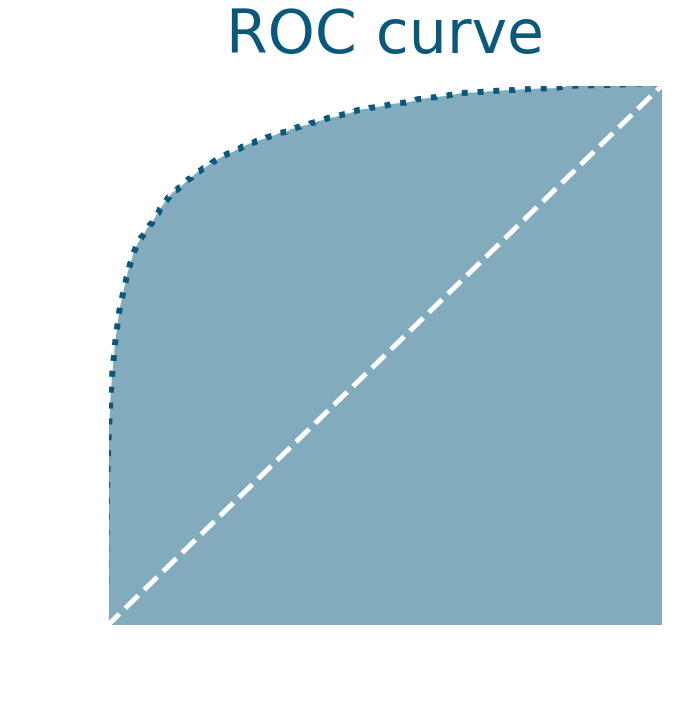

In [74]:
def ROC_Plot_one_model(y, y_pred, y_pred_proba, model):
    
#     y_pred = model.predict(X)
#     y_pred_rounded = np.round(y_pred,0).astype(int)
    f1 = f1_score(y, y_pred, average = 'samples')
    print("The F1 score is ", f1)
    
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], thresholds = roc_curve(y[:, i], y_pred_proba[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # First aggregate all false positive rates across classes
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(num_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= num_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    fig = plt.figure(figsize=[10,10])
    ax = fig.add_subplot(111)

    lw=5
    
    rcParams['axes.titlepad'] = 30 
    rcParams['axes.labelpad'] = 20
                
    ax.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='#09597E', linestyle=':', linewidth=6)
    
    font = {'family': 'sans-serif',
            'color':  'white',
            'weight': 'normal',
            'size': 40,
            }

#     colors = cycle(['aqua', 'darkorange', 'cornflowerblue','r','pink','g','b','r','purple'])
#     for i, color in zip(range(num_classes), colors):
#         plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='{0} (area = {1:0.2f})'.format([0,1,2,3,4,5,6,7,11,14,18,19,21,23,25][i], roc_auc[i]))
# "My name is {0}".format('Fred')
    ax.plot([0, 1], [0, 1], 'w--', lw=lw)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('False Positive Rate', fontdict=font)
    ax.set_ylabel('True Positive Rate', fontdict=font)
    ax.set_title('ROC curve', fontdict=font)
#     ax.set_legend(loc="lower right", fontsize=8)
#     ax.set_rcParams['font.size'] = 20
    ax.spines['bottom'].set_linewidth(5)
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['top'].set_linewidth(5)
    ax.spines['right'].set_color('white')
    ax.spines['right'].set_linewidth(5)
    ax.spines['left'].set_color('white')
    ax.spines['left'].set_linewidth(5)
    ax.xaxis.label.set_color('white')
#     ax.set_xticklabels(ax.get_xticks(), font)
    ax.tick_params(axis='both', colors='white', labelsize=20)
#     plt.set_rcParams['font.size'] = 20
#     plt.show()
    
    ax.fill_between(fpr["macro"], 0, tpr["macro"], facecolor='#09597E', alpha = .5)
    
    plt.savefig("ROC_Curve.png", transparent=True, bbox_inches='tight')
    
    
ROC_Plot_one_model(y_test_f, y_pred, y_pred_proba, model3)


In [ ]:
# # datagen = ImageDataGenerator(
# #     featurewise_center=False,
# #     featurewise_std_normalization=False,
# #     rotation_range=0,
# #     width_shift_range=0,
# #     height_shift_range=0,
# #     horizontal_flip=True,
# #     vertical_flip=True)

# # datagen.fit(X_train)

# # BEST
# ################################################################################
# # Name the model
# model_S1 = Sequential()
# model3 = model_S1

# model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape_img)) 
# model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
# model3.add(MaxPooling2D(pool_size=(2, 2)))

# model3.add(GlobalAveragePooling2D())
# model3.add(Dense(num_classes, activation=activation))

# model3.compile(loss=loss,
#               optimizer=optimizer,
#               metrics=[metrics])
              

# early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

# model3.summary()






# # Callbacks

# file_path = '../Generated_Files/' + 'model3' + '_{epoch:02d}-{val_loss:.2f}.hdf5'
# model_checkpoint = ModelCheckpoint(filepath=file_path, save_best_only=True)


# tensorboard = TensorBoard(log_dir='../tensorboard')

# early_stopping = EarlyStopping(monitor='val_loss', # what metric to determine when to stop.
#                                min_delta=0, # change in the metric, i.e. val_loss stops decreasing
#                                patience=10, # when to stop in number of epochs, i.e. stop after 10 epochs from the minimum val_loss 
#                                verbose=1, # tell you why it stopped
#                                mode='auto', # keras figures out if your min/max the monitor, i.e. minimizing loss vs maximizing accuracy
#                                restore_best_weights=True) # resotres the best weights, i.e. model runs 13 epochs and stops. weights are restored from epoch 3 and and not 13

# history3 = model3.fit([data_1_train, data_2_train], label_train, 
#           validation_data=([data_1_val, data_2_val], label_val),
#                   epochs=200, batch_size=128, shuffle=True,
#                   callbacks=[model_checkpoint, early_stopping]) # add callbacks






                                            
# history3 = model3.fit_generator(datagen.flow(X_train, y_train,
#                                            batch_size=batch_size),
#                               steps_per_epoch=len(X_train)/batch_size,
#                               epochs=epochs,
#                               verbose=1,
#                               validation_data=(X_test, y_test)
#                              )

# import pickle
# pickle.dump(model3, open( "Models/15categories/model3_scratch_4d_jason.pkl", "wb" ) )

In [9]:
# Load parameters
################################################################################
colors = 4
pixels = 512
single_label = ['softmax','categorical_crossentropy'] # multi_label = ['sigmoid','binary_crossentropy']
multi_label = ['sigmoid','binary_crossentropy']
activation = multi_label[0]
loss = multi_label[1]

optimizer = optimizers.Adam(lr = .0001) # MOMENTUM OF .09
metrics = 'accuracy'
batch_size=32
epochs=100

num_classes = 15
input_shape_img = (pixels, pixels, colors)
################################################################################

In [3]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=True)

datagen.fit(X_train)

In [11]:
# BEST
################################################################################
# Name the model
model_S1 = Sequential()
model3 = model_S1

model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape_img)) 
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(GlobalAveragePooling2D())
model3.add(Dense(num_classes, activation=activation))

model3.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])
              

early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

# model3.summary()
                            
history3 = model3.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=batch_size),
                              steps_per_epoch=len(X_train)/batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test),
                              callbacks = early_stop
                             )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 512, 512, 32)      1184      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 128, 32)      9248      
__________

In [12]:
pickle.dump(model3, open( "Models/15categories/model3_scratch_4d_gmf_100e.pkl", "wb" ) )

In [ ]:
# model2 = pickle.load( open( "Models/15categories/model3_paper_4d_gmf_100.pkl", "rb" ) )

OLD CODE:
counts_e = pd.DataFrame(y_test).sum(axis=0).values
for i,count in enumerate(counts_e):
    print(i,count)
    
    
NEW FUNCTION:    
def count_per_class(y_train):
    counts_e = pd.DataFrame(y_train).sum(axis=0).values
    D = {}
    for i,count in enumerate(counts_e):
        print(i,count)
        D[i]=count
    return D
count_per_class(y_train)
__________________________________________________________________________________________

OLD CODE:

counts_e = pd.DataFrame(y_test).sum(axis=0).values
class_weights = []
for i,count in enumerate(counts_e):
    print(i,np.round(len(y_test)/count,2))
    class_weights.append(round(len(y_test)/count,2))
    
NEW FUNCTION: 

def class_weights(y_train):
    counts_e = pd.DataFrame(y_train).sum(axis=0).values
    class_weights = []
    for i,count in enumerate(counts_e):
        print(i,np.round(len(y_train)/count,2))
        class_weights.append(round(len(y_train)/count,2))
class_weights(y_train)



In [13]:
y_pred_proba = model3.predict(X_test_f)

def compute_thresholds(y_pred_proba,y_true):
    best_thresh = []
    for label in range(15):
        thresh_list = [x/10 for x in range(10)]
        f_list = []
        for thresh in thresh_list:
            pred = y_pred_proba[:,label].copy()
            pred[pred >= thresh]=1
            pred[pred < thresh]=0
            f = f1_score(y_true[:,label],pred)
            f_list.append(f)
        best_thresh.append(thresh_list[f_list.index(max(f_list))])
    return best_thresh

best_thresh = compute_thresholds(y_pred_proba,y_test_f)


In [14]:
y_pred = y_pred_proba
for i in range(15):
    y_pred[:,i][y_pred[:,i]>=best_thresh[i]]=1
    y_pred[:,i][y_pred[:,i]<best_thresh[i]]=0

In [15]:
def get_f1(true, pred):
    f1 = f1_score(true, pred, average = 'samples')
    print(f1)
    return f1
get_f1(y_test_f, y_pred)

0.6844680462616786


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.6844680462616786

In [19]:
h_loss_f = hamming_loss(y_test_f, y_pred)
print(h_loss_f)

0.062332610990720676


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.6844680462616786
The F1 score is  0.6844680462616786


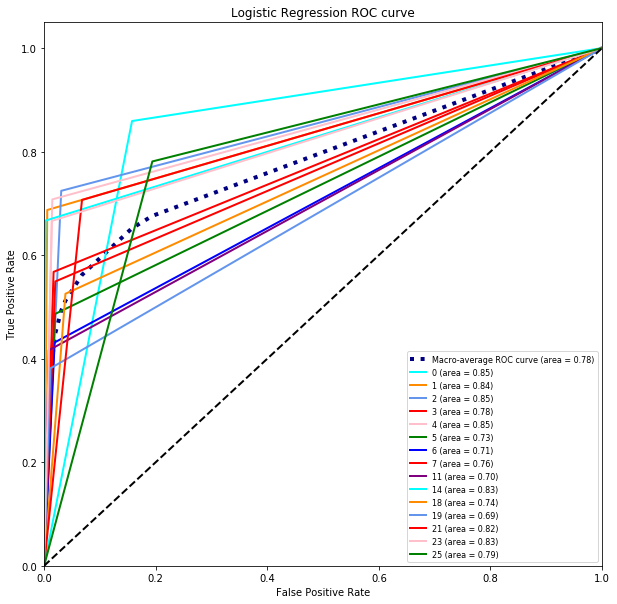

<Figure size 432x288 with 0 Axes>

In [20]:
def ROC_Plot_one_model(y_true, y_pred, model):
    
    f1 = get_f1(y_test_f, y_pred)
    print("The F1 score is ", f1)
    
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], thresholds = roc_curve(y_true[:, i], y_pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # First aggregate all false positive rates across classes
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(num_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= num_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    plt.figure(figsize=[10,10])
    
    lw=2
                
    plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','r','pink','g','b','r','purple'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'.format([0,1,2,3,4,5,6,7,11,14,18,19,21,23,25][i], roc_auc[i]))
# "My name is {0}".format('Fred')
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC curve')
    plt.legend(loc="lower right", fontsize=8)
    plt.rcParams['font.size'] = 20
    plt.show()
    
    plt.savefig("LOGREG_Curves_Train.svg")
    
    
ROC_Plot_one_model(y_test_f, y_pred, model3)


In [145]:
def compute_thresholds(y_pred,y_true):
    best_thresh = []
    for label in range(15):
        thresh_list = [x/10 for x in range(10)]
        f_list = []
        for thresh in thresh_list:
            pred = y_pred[:,label].copy()
            pred[pred >= thresh]=1
            pred[pred < thresh]=0
            f = f1_score(y_true[:,label],pred)
            f_list.append(f)
        best_thresh.append(thresh_list[f_list.index(max(f_list))])
    return best_thresh

In [146]:
best_thresh = compute_thresholds(y_pred,y_test_f)
best_thresh

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.4, 0.1, 0.2, 0.2, 0.5, 0.2, 0.3, 0.2, 0.1, 0.3, 0.1, 0.1, 0.3, 0.3, 0.3]

In [147]:
pred = y_pred
for i in range(15):
    pred[:,i][pred[:,i]>=best_thresh[i]]=1
    pred[:,i][pred[:,i]<best_thresh[i]]=0

In [148]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test_f, pred, average = 'samples')
print(f1)

0.5949749561434842


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [149]:
from sklearn.metrics import hamming_loss
h_loss = hamming_loss(y_test_f, pred)
# h_loss_f = hamming_loss(y_test_f, y_pred_f.astype(int))
print(h_loss)

0.08031338556426071


In [23]:
from sklearn.metrics import f1_score

y_pred = model3.predict(X_test)
y_pred_rounded = np.round(y_pred,0).astype(int)
f1 = f1_score(y_test, y_pred_rounded, average = 'samples')
print(f1)

0.4594039695745187


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [26]:
from sklearn.metrics import hamming_loss
h_loss = hamming_loss(y_test, y_pred.astype(int))
# h_loss_f = hamming_loss(y_test_f, y_pred_f.astype(int))
print(h_loss)

0.1043261231281198


In [97]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,auc
from scipy import interp
from matplotlib import pyplot as plt
from itertools import cycle

def ROC_Plot_one_model(X, y, model):
    
    y_pred = model.predict(X)
    y_pred_rounded = np.round(y_pred,0).astype(int)
    f1 = f1_score(y, y_pred_rounded, average = 'samples')
    print("The F1 score is ", f1)
    
    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(num_classes):
        fpr[i], tpr[i], thresholds = roc_curve(y[:, i], y_pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # First aggregate all false positive rates across classes
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(num_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= num_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    plt.figure(figsize=[10,10])
    
    lw=2
                
    plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','r','pink','g','b','r','purple'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'.format([0,1,2,3,4,5,6,7,11,14,18,19,21,23,25][i], roc_auc[i]))
# "My name is {0}".format('Fred')
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC curve')
    plt.legend(loc="lower right", fontsize=8)
    plt.rcParams['font.size'] = 20
    plt.show()
    
    plt.savefig("LOGREG_Curves_Train.svg")

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


The F1 score is  0.46279340207494896


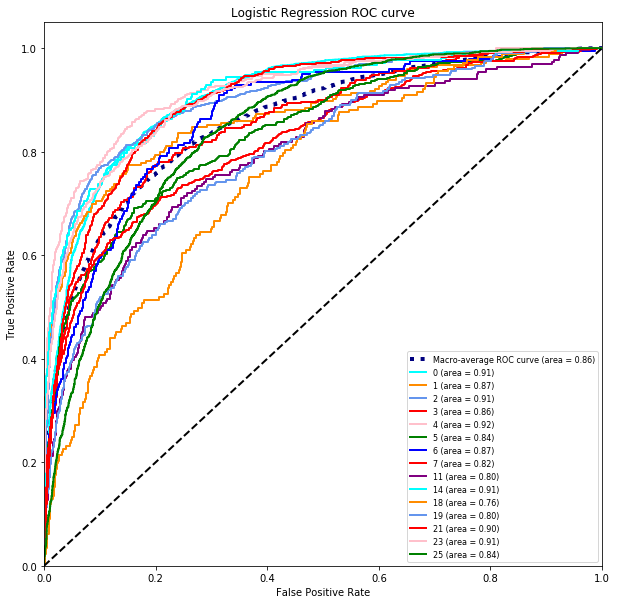

<Figure size 432x288 with 0 Axes>

In [28]:
ROC_Plot_one_model(X_test_f, y_test_f, model3)

In [16]:
counts_e = pd.DataFrame(y_test).sum(axis=0).values
for i,count in enumerate(counts_e):
    print(i,count)

0 2078
1 204
2 571
3 267
4 284
5 370
6 166
7 489
8 155
9 168
10 119
11 236
12 649
13 451
14 1317


In [19]:
counts_e = pd.DataFrame(y_test).sum(axis=0).values
class_weights = []
for i,count in enumerate(counts_e):
    print(i,np.round(len(y_test)/count,2))
    class_weights.append(round(len(y_test)/count,2))

0 2.31
1 23.57
2 8.42
3 18.01
4 16.93
5 12.99
6 28.96
7 9.83
8 31.02
9 28.62
10 40.4
11 20.37
12 7.41
13 10.66
14 3.65


# From the paper
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5427497/

In [ ]:
################################################################################
# Name the model
model_S1 = Sequential()
model2 = model_S1

model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape_img)) 
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same')) 
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same')) 
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same')) 
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same')) 
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same')) 
model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(GlobalAveragePooling2D())
model2.add(Dense(512, activation=activation))
model2.add(Dense(512, activation=activation))
model2.add(Dense(15, activation=activation))

model2.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])
              
    
'''
We trained a deep convolutional neural network that has 11 layers (eight convolutional 
and ### three fully connected ###) with learnable weights (Figure 1C). We used 3 × 3 patterns 
with step size (stride) 1 for convolutional layers, 2 × 2 aggregation regions with step 
size 2 for pooling layers, and rectified linear unit nonlinearities for the activation 
function. The number of units in the convolutional layers was 64, 64, 128, 128, 256, 256, 
256, and 256, and in the fully connected layers was 512, 512, and 12. We initialized the 
weights using the Glorot-normal initialization technique (Glorot and Bengio 2010), and 
used batch normalization (Ioffe and Szegedy 2015) after each convolutional or fully 
connected layer, but before activation functions. For each image, per-pixel training set 
mean was subtracted before use. Cross-entropy loss was minimized using stochastic gradient 
descent with momentum of 0.9, initial learning rate of 0.1, and a mini-batch size of 100. 
Learning rate was divided by two after every 16,250 iterations (25 epochs). To reduce 
overfitting, we used weight decay of 0.0005, and dropout with rate of 0.5 for the first 
two fully connected layers. The models were trained for 195,000 iterations (300 epochs over 
full training data), and based on validation loss, the model at iteration 130,000 was chosen
for all experiments. The training took 3 days on an NVIDIA Tesla K20m graphical processing 
unit
'''    
    
    
# model.summary()

early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

model2.summary()
                                            
history2 = model2.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=batch_size),
                              steps_per_epoch=len(X_train)/batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test)
                             )

# Mostly flat after 16 epochs, peaks at 82% on #29 so may learn more

In [6]:
################################################################################
# Name the model
model_S1 = Sequential()
model2 = model_S1

model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape_img)) 
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same')) 
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(GlobalAveragePooling2D())
model2.add(Dense(num_classes, activation=activation))

model2.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])
              
# model.summary()

early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

model2.summary()
                                            
history2 = model2.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=batch_size),
                              steps_per_epoch=len(X_train)/batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test)
                             )

# Mostly flat after 16 epochs, peaks at 82% on #29 so may learn more

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 512, 512, 32)      1184      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        9248      
__________

Mostly flat after 16 epochs, peaks at 82% on #29 so may learn more

In [11]:
# def plotKerasLearningCurve():
#     plt.figure(figsize=(10,5))
#     metrics = np.load('logs.npy')[()]
#     filt = ['acc'] # try to add 'loss' to see the loss learning curve
#     for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
#         l = np.array(metrics[k])
#         plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
#         x = np.argmin(l) if 'loss' in k else np.argmax(l)
#         y = l[x]
#         plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
#         plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
#     plt.legend(loc=4)
#     plt.axis([0, None, None, None]);
#     plt.grid()
#     plt.xlabel('Number of epochs')
#     plt.ylabel('Accuracy')
    
# def plot_learning_curve(history):
#     plt.figure(figsize=(8,8))
#     plt.subplot(1,2,1)
#     plt.plot(history.history['acc'])
#     plt.plot(history.history['val_acc'])
#     plt.title('model accuracy')
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.savefig('./accuracy_curve.png')
#     plt.subplot(1,2,2)
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epoch')
#     plt.legend(['train', 'test'], loc='upper left')
#     plt.savefig('./loss_curve.png')

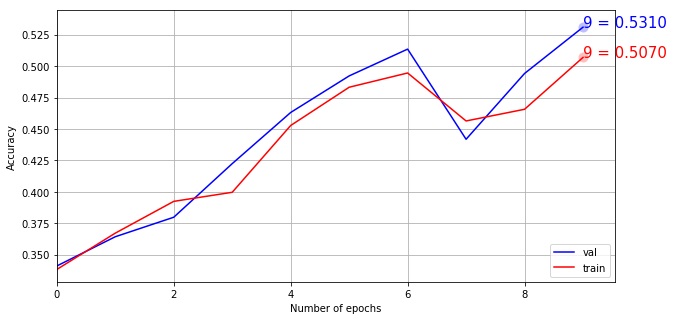

In [12]:
# import matplotlib.pyplot as plt

# plotKerasLearningCurve()

In [15]:
import pickle
pickle.dump(model2, open( "Models/3categories/model_scratch_4d_1.pkl", "wb" ) )

In [16]:
################################################################################
# Name the model
model_S1 = Sequential()
model3 = model_S1

model3.add(Conv2D(112, (3, 3), activation='relu', padding='same', input_shape=input_shape_img)) 
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(56, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(28, (3, 3), activation='relu', padding='same')) 
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(14, (3, 3), activation='relu', padding='same')) 
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(GlobalAveragePooling2D())
model3.add(Dense(num_classes, activation=activation))

model3.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])
              
# model.summary()

early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

model3.summary()
                                            
history3 = model3.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=batch_size),
                              steps_per_epoch=len(X_train)/batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test)
                             )


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 512, 512, 112)     4144      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 256, 256, 112)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 256, 56)      56504     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 56)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 32)      16160     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 28)        8092      
__________

KeyboardInterrupt: 

FAIL?

Also gets to about 80% around epoch 11, but picks up some pace from 24-30 to finish at 8.33... maybe could push it deeper with more images or more epochs

In [18]:
################################################################################
# Name the model
model_S1 = Sequential()
model4 = model_S1

model4.add(Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=input_shape_img)) 
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model4.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, (4, 4), activation='relu', padding='same'))
model4.add(Conv2D(32, (4, 4), activation='relu', padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model4.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(32, (5, 5), activation='relu', padding='same')) 
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(GlobalAveragePooling2D())
model4.add(Dense(num_classes, activation=activation))

model4.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])
              
# model.summary()

early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)

model4.summary()
                                            
history4 = model4.fit_generator(datagen.flow(X_train, y_train,
                                           batch_size=batch_size),
                              steps_per_epoch=len(X_train)/batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test)
                             )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 512, 512, 32)      544       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 128, 128, 32)      16416     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 32)      16416     
__________

In [36]:
y_pred = model4.predict(X_test_f)

In [52]:
import pandas as pd

y_pred = pd.DataFrame(y_pred, columns=[4, 5, 21])
y_pred.shape

(628, 3)

In [48]:
y_true = pd.DataFrame(y_test, columns=[4, 5, 21])

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [516, 628]

88% accurate over X_test_f

# S.2
- Method: Scratch_2
- Parameters: Adam, accuracy, 56
- Scope: Images with one label, 3D

In [ ]:
################################################################################
# Name the model
model_S2 = Sequential()
model = model_S2
################################################################################

In [ ]:
# Brenner
model.add(Dropout(0.2, seed=21))
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(224, 224,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(28, activation=activation))

In [ ]:
simple_model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

In [ ]:
simple_model.fit(X_train, np.array(y_train), epochs=epochs, batch_size=batch_size, verbose=1, validation_data=(X_test, np.array(y_test)))

In [ ]:
y_pred_S2 = model.predict(X_test)

In [ ]:
simple_weighted_model=models.Sequential()
simple_weighted_model.add(Dropout(0.2, seed=21))
simple_weighted_model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(224, 224,1)))
simple_weighted_model.add(layers.MaxPooling2D((2, 2)))
simple_weighted_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
simple_weighted_model.add(layers.MaxPooling2D((2, 2)))
simple_weighted_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
simple_weighted_model.add(layers.MaxPooling2D((2, 2)))
simple_weighted_model.add(layers.Flatten())
simple_weighted_model.add(layers.Dense(128, activation='relu'))
simple_weighted_model.add(layers.Dense(28, activation='sigmoid'))

In [ ]:
simple_weighted_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
class_weight = {}
for i in range(28):
    if y_s_train.sum(axis=0)[i] ==0:
        class_weight[i]=1
    else:
        class_weight[i] = 1/y_s_train.sum(axis=0)[i]

In [ ]:
simple_weighted_model.fit(X_s_train, np.array(y_s_train), epochs=5, batch_size=56, verbose=1, validation_data=(X_s_test, np.array(y_s_test)), class_weight=class_weight)

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score


from keras.models import Model, model_from_json
from keras.layers import Dense, Input, Embedding, GlobalAveragePooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras import regularizers

import tensorflow as tf

In [ ]:
def f1_score(y_true, y_pred):
    """
    Compute the micro f(b) score with b=1.
    """
    y_true = tf.cast(y_true, "float32")
    y_pred = tf.cast(tf.round(y_pred), "float32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred


    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)


    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 2 * precision * recall / (precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)


    return tf.reduce_mean(f_score)



def build_model(num_features,
    num_classes,
    embedding_dims,
    maxlen):
    """
    """

    input_layer = Input(shape=(maxlen,), dtype='int32')


    embeddings = Embedding(num_features,
        embedding_dims,
        input_length=maxlen,
        embeddings_regularizer=regularizers.l1(7e-7))(input_layer)

    avg_layer = GlobalAveragePooling1D()(embeddings)
    predictions = Dense(num_classes, activation='sigmoid')(avg_layer)

    model = Model(inputs=input_layer, outputs=predictions)
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[f1_score])

    model.summary()

    return model



def load_model():
    """
    """

    json_file = open('multilabel_model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)

    model.load_weights('multilabel_model.h5')
    print("Loaded model from disk")

    model.summary()

    model.compile(loss='binary_crossentropy',
        optimizer='adam',
        metrics=[f1_score])


    return model

In [ ]:
# if __name__ == '__main__':

#     ngram_range = 1
#     maxlen = 200
#     batch_size = 32
#     embedding_dims = 50
#     epochs = 500
#     num_classes = 20 


#     num_features = len(word_index)
#     print('Found %d words' % num_features)

    
#     model = build_model(num_features,num_classes,embedding_dims,maxlen)

#     model_json = model.to_json()
#     with open("multilabel_model.json", "w") as json_file:
#         json_file.write(model_json)


#     early_stopping =EarlyStopping(monitor='val_f1_score',
#         patience=15,
#         mode='max')
#     bst_model_path = 'multilabel_model.h5'
#     model_checkpoint = ModelCheckpoint(bst_model_path,
#         monitor='val_f1_score',
#         verbose=1,
#         save_best_only=True,
#         mode='max',
#         save_weights_only=True)

#     model.fit(X_s_train, y_s_train,
#         batch_size=batch_size,
#         epochs=epochs,
#         validation_data=(X_val, y_val),
#         callbacks=[model_checkpoint,early_stopping])
    

#     model = load_model()
#     y_pred = model.predict(X_s_test)

#     print('AUC:',roc_auc_score(y_s_test, y_pred))
#     y_pred[y_pred > 0.25] = 1
#     y_pred[y_pred <= 0.25] = 0
    

#     for i in range(10):
#         pred,lab = y_pred[i],y_s_test[i]
#         print( np.where(pred == 1), np.where(lab == 1))
        

#     print( precision_recall_fscore_support(y_s_test, y_pred, average='micro'))
#     print( precision_recall_fscore_support(y_s_test, y_pred, average='macro'))

In [ ]:
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import matplotlib.pyplot as plt
# %matplotlib inline
# from PIL import Image
# from scipy.misc import imread

# import tensorflow as tf

# # LOAD VGG16

# from keras.applications import VGG16
# from keras.optimizers import SGD

# model = VGG16()
# !ls -lha ~/.keras/models
# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer=sgd, loss='categorical_crossentropy')

In [ ]:
matrix = metrics.confusion_matrix(y_s_test.argmax(axis=1), y_pred.argmax(axis=1))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
base_model = model1 # Topless
# Add top layer
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
#### Playing with other architectures
#     x = Flatten() (x)
#     x = Dense(64) (x)
#     x = Activation('relu') (x)
#     x = Dropout(0.5) (x)
#     x = Dense(32) (x)
#     x = Activation('relu') (x)
#     x = Dropout(0.5) (x)
####
predictions = Dense(28, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# Train top layer
for layer in base_model.layers:
    layer.trainable = False
model.compile(loss='categorical_crossentropy', 
      optimizer=optimizer1, 
      metrics=['accuracy'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
model.summary()
# Fit model
model.fit(X_s_train, y_s_train, epochs=4, validation_data=(X_s_test, y_s_test), verbose=1,callbacks = [MetricsCheckpoint('logs')])



In [ ]:
# x = (Conv2D(28, (3, 3), activation='relu', padding='same')) (x)
# x = (Conv2D(28, (3, 3), activation='relu', padding='same')) (x)
# x = (MaxPooling2D(pool_size=(2, 2))) (x)
# x = (Conv2D(56, (3, 3), activation='relu', padding='same')) (x)
# x = (Conv2D(56, (3, 3), activation='relu', padding='same')) (x)
# x = (MaxPooling2D(pool_size=(2, 2))) (x)
# x = (Conv2D(112, (3, 3), activation='relu', padding='same')) (x)
# x = (Conv2D(112, (3, 3), activation='relu', padding='same')) (x)
# x = (MaxPooling2D(pool_size=(2, 2))) (x)
# x = (Conv2D(224, (3, 3), activation='relu', padding='same')) (x)
# x = (Conv2D(224, (3, 3), activation='relu', padding='same')) (x)
# x = (MaxPooling2D(pool_size=(2, 2))) (x)
# x = (Conv2D(112, (3, 3), activation='relu', padding='same')) (x)
# x = (Conv2D(112, (3, 3), activation='relu', padding='same')) (x)
# x = (MaxPooling2D(pool_size=(2, 2))) (x)
# x = (Conv2D(56, (3, 3), activation='relu', padding='same')) (x)
# x = (Conv2D(56, (3, 3), activation='relu', padding='same')) (x)
# x = (MaxPooling2D(pool_size=(2, 2))) (x)
# x = (Conv2D(28, (3, 3), activation='relu', padding='same')) (x)
# x = (Conv2D(28, (3, 3), activation='relu', padding='same')) (x)
# x = (MaxPooling2D(pool_size=(2, 2))) (x)
# x = (Conv2D(14, (3, 3), activation='relu', padding='same')) (x)
# x = (Conv2D(14, (3, 3), activation='relu', padding='same')) (x)
# x = (MaxPooling2D(pool_size=(2, 2))) (x)

# x = (GlobalAveragePooling2D()) (x)


In [6]:
y_train.astype(int)

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 0, 0]])

# DATA VIZ

In [7]:
# train_asint = y_train.astype(int)
co = y_train.T.dot(y_train)
co

array([[8231,  377, 1138,  351,   67,  525,   63,  688,  169,  146,  175,
         358,  816,  525, 2326],
       [ 377,  801,  106,   12,   32,   22,   14,   37,    9,    3,    4,
          14,   48,   27,  163],
       [1138,  106, 2338,    2,   35,   39,   49,  117,   48,   49,   14,
          37,  134,  137,  507],
       [ 351,   12,    2, 1007,   13,   10,   16,   26,   10,    8,    4,
          13,   19,   35,  178],
       [  67,   32,   35,   13, 1184,    3,    2,   23,   12,   11,    9,
          12,   92,   30,  216],
       [ 525,   22,   39,   10,    3, 1613,    8,   44,   23,   21,   10,
          13,   74,   33,  367],
       [  63,   14,   49,   16,    2,    8,  666,   11,    1,    4,    5,
           3,   19,    4,   91],
       [ 688,   37,  117,   26,   23,   44,   11, 1752,    4,    8,    4,
          15,   79,    5,  246],
       [ 169,    9,   48,   10,   12,   23,    1,    4,  702,    6,    1,
          12,   13,    4,   90],
       [ 146,    3,   49,    8,   11,

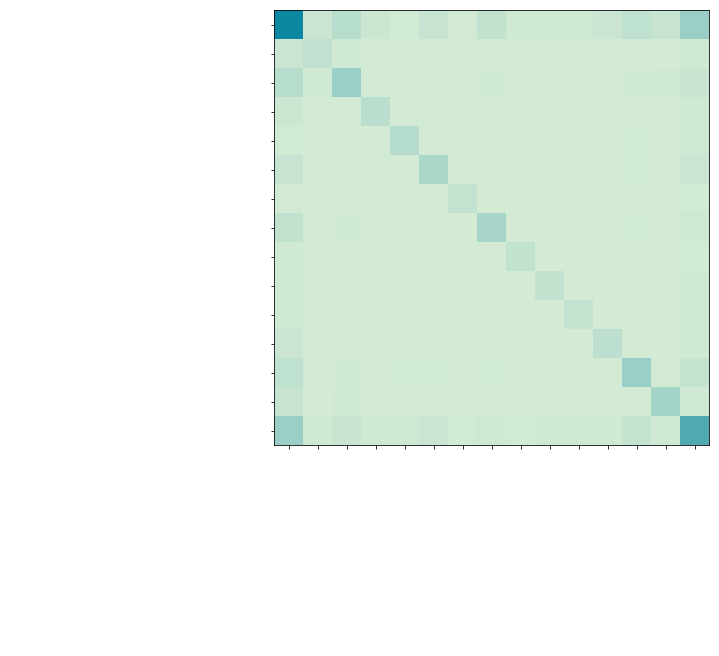

In [94]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.colors
categories = ["Nucleoplasm","Nuclear membrane","Nucleoli", "Nucleoli fibrillar center", "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", "Golgi apparatus","Intermediate filaments", "Microtubules", "Microtubule organizing center", "Centrosome", "Plasma membrane", "Mitochondria","Cytosol"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#D3EBD5","#0B87A1"])
plt.figure(figsize=(8,8)) 
plt.xticks(range(15), categories, rotation=45, ha="right", rotation_mode="anchor", color='w', fontsize='xx-large')
plt.yticks(range(15), categories, color='w', fontsize='xx-large')
plt.imshow(co, cmap=cmap, interpolation='nearest')
# plt.clim(0,100)
plt.show()

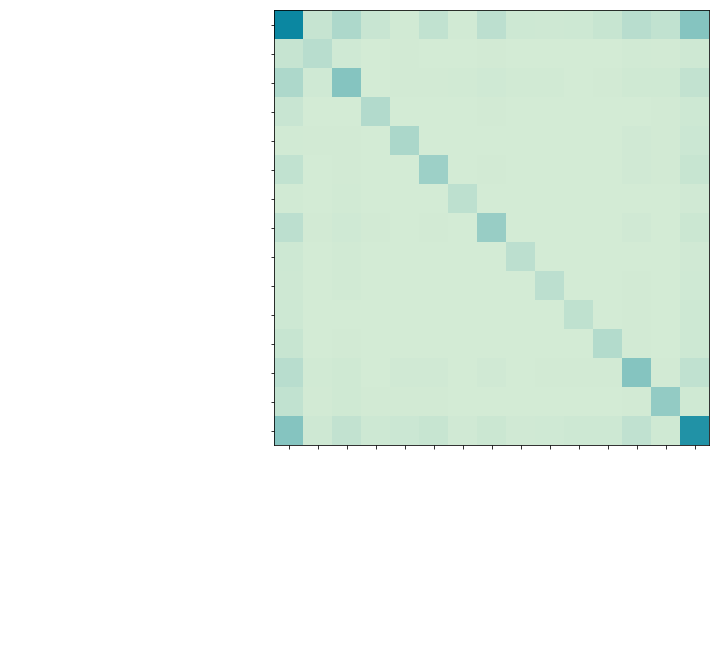

In [95]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.colors
categories = ["Nucleoplasm","Nuclear membrane","Nucleoli", "Nucleoli fibrillar center", "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", "Golgi apparatus","Intermediate filaments", "Microtubules", "Microtubule organizing center", "Centrosome", "Plasma membrane", "Mitochondria","Cytosol"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#D3EBD5","#0B87A1"])
plt.figure(figsize=(8,8)) 
plt.xticks(range(15), categories, rotation=45, ha="right", rotation_mode="anchor", color='w', fontsize='xx-large')
plt.yticks(range(15), categories, color='w', fontsize='xx-large')
plt.imshow(co, cmap=cmap, interpolation='nearest')
plt.clim(0,6000)
plt.show()

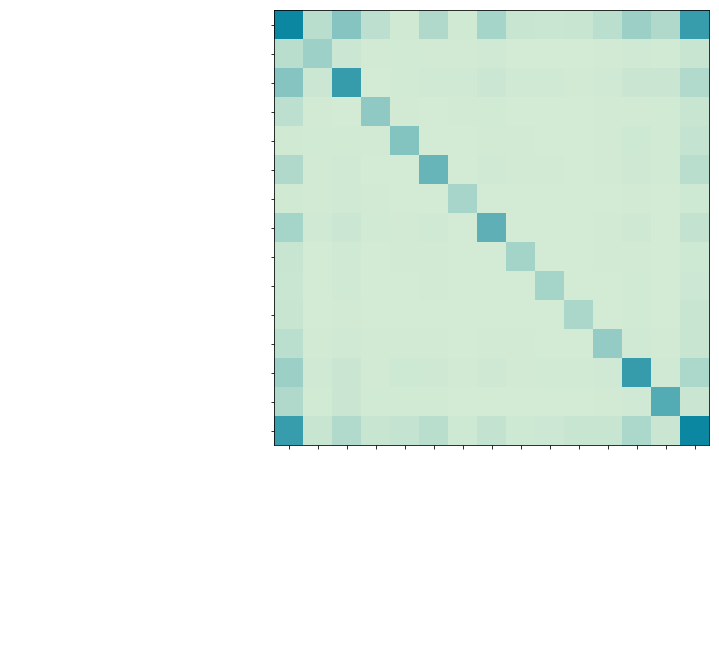

In [96]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.colors
categories = ["Nucleoplasm","Nuclear membrane","Nucleoli", "Nucleoli fibrillar center", "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", "Golgi apparatus","Intermediate filaments", "Microtubules", "Microtubule organizing center", "Centrosome", "Plasma membrane", "Mitochondria","Cytosol"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#D3EBD5","#0B87A1"])
plt.figure(figsize=(8,8)) 
plt.xticks(range(15), categories, rotation=45, ha="right", rotation_mode="anchor", color='w', fontsize='xx-large')
plt.yticks(range(15), categories, color='w', fontsize='xx-large')
plt.imshow(co, cmap=cmap, interpolation='nearest')
plt.clim(0,3000)
plt.show()

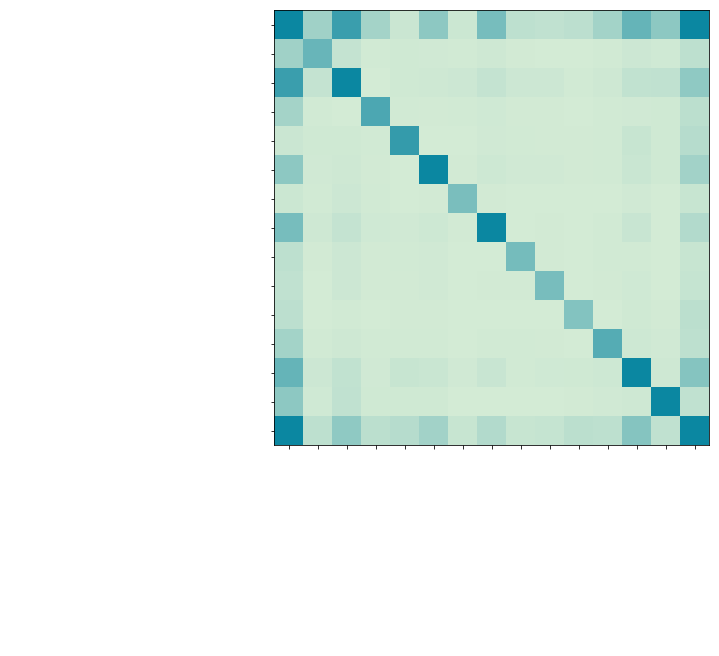

In [97]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.colors
categories = ["Nucleoplasm","Nuclear membrane","Nucleoli", "Nucleoli fibrillar center", "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", "Golgi apparatus","Intermediate filaments", "Microtubules", "Microtubule organizing center", "Centrosome", "Plasma membrane", "Mitochondria","Cytosol"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#D3EBD5","#0B87A1"])
plt.figure(figsize=(8,8)) 
plt.xticks(range(15), categories, rotation=45, ha="right", rotation_mode="anchor", color='w', fontsize='xx-large')
plt.yticks(range(15), categories, color='w', fontsize='xx-large')
plt.imshow(co, cmap=cmap, interpolation='nearest')
plt.clim(0,1500)
plt.show()

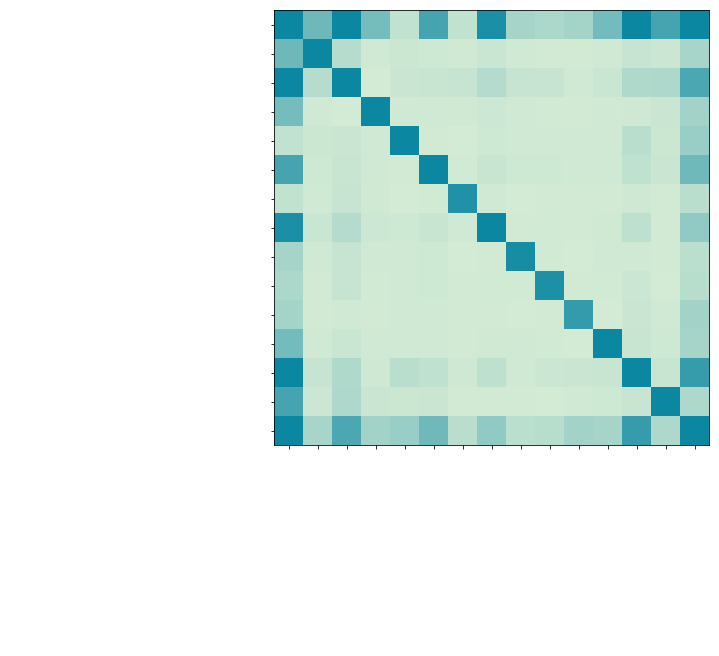

In [98]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.colors
categories = ["Nucleoplasm","Nuclear membrane","Nucleoli", "Nucleoli fibrillar center", "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", "Golgi apparatus","Intermediate filaments", "Microtubules", "Microtubule organizing center", "Centrosome", "Plasma membrane", "Mitochondria","Cytosol"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#D3EBD5","#0B87A1"])
plt.figure(figsize=(8,8)) 
plt.xticks(range(15), categories, rotation=45, ha="right", rotation_mode="anchor", color='w', fontsize='xx-large')
plt.yticks(range(15), categories, color='w', fontsize='xx-large')
plt.imshow(co, cmap=cmap, interpolation='nearest')
plt.clim(0,750)
plt.show()

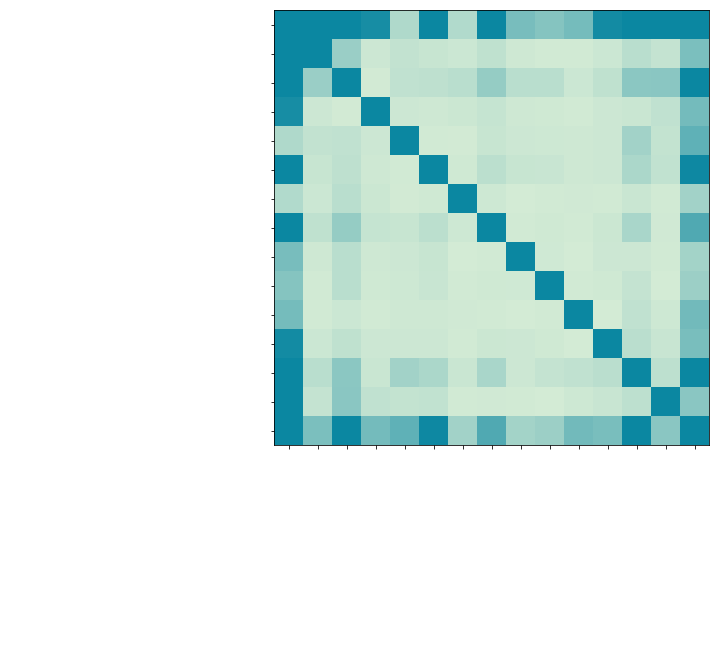

In [99]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.colors
categories = ["Nucleoplasm","Nuclear membrane","Nucleoli", "Nucleoli fibrillar center", "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", "Golgi apparatus","Intermediate filaments", "Microtubules", "Microtubule organizing center", "Centrosome", "Plasma membrane", "Mitochondria","Cytosol"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#D3EBD5","#0B87A1"])
plt.figure(figsize=(8,8)) 
plt.xticks(range(15), categories, rotation=45, ha="right", rotation_mode="anchor", color='w', fontsize='xx-large')
plt.yticks(range(15), categories, color='w', fontsize='xx-large')
plt.imshow(co, cmap=cmap, interpolation='nearest')
plt.clim(0,375)
plt.show()

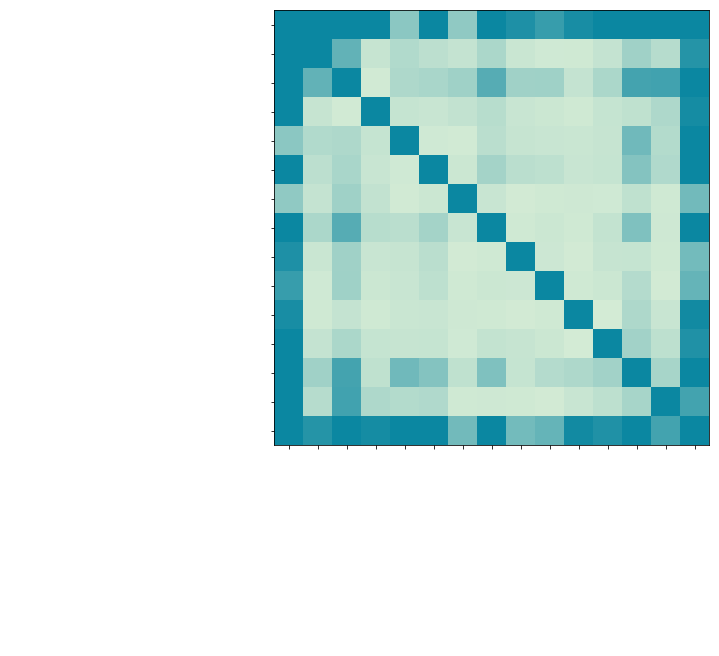

In [100]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.colors
categories = ["Nucleoplasm","Nuclear membrane","Nucleoli", "Nucleoli fibrillar center", "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", "Golgi apparatus","Intermediate filaments", "Microtubules", "Microtubule organizing center", "Centrosome", "Plasma membrane", "Mitochondria","Cytosol"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#D3EBD5","#0B87A1"])
plt.figure(figsize=(8,8)) 
plt.xticks(range(15), categories, rotation=45, ha="right", rotation_mode="anchor", color='w', fontsize='xx-large')
plt.yticks(range(15), categories, color='w', fontsize='xx-large')
plt.imshow(co, cmap=cmap, interpolation='nearest')
plt.clim(0,188)
plt.show()

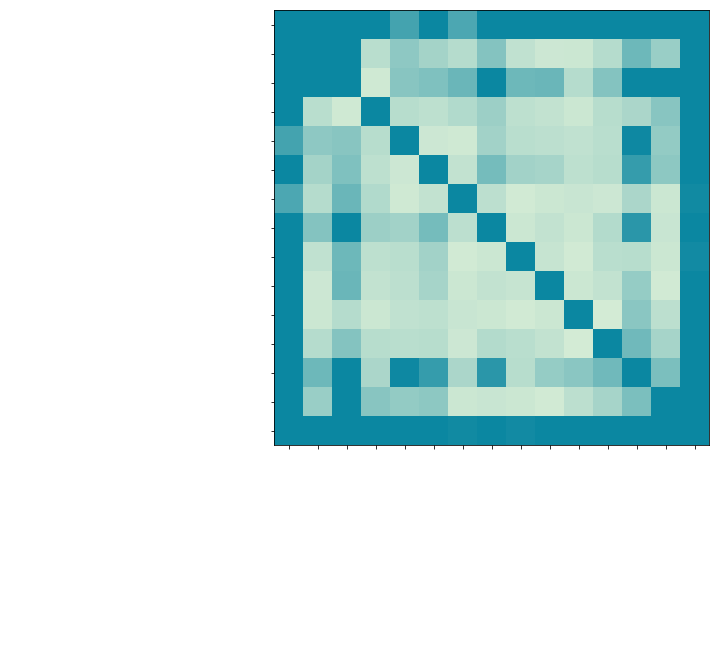

In [101]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib.colors
categories = ["Nucleoplasm","Nuclear membrane","Nucleoli", "Nucleoli fibrillar center", "Nuclear speckles", "Nuclear bodies", "Endoplasmic reticulum", "Golgi apparatus","Intermediate filaments", "Microtubules", "Microtubule organizing center", "Centrosome", "Plasma membrane", "Mitochondria","Cytosol"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#D3EBD5","#0B87A1"])
plt.figure(figsize=(8,8)) 
plt.xticks(range(15), categories, rotation=45, ha="right", rotation_mode="anchor", color='w', fontsize='xx-large')
plt.yticks(range(15), categories, color='w', fontsize='xx-large')
plt.imshow(co, cmap=cmap, interpolation='nearest')
plt.clim(0,94)
plt.show()

In [37]:
import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    "", ["#D3EBD5","violet","blue"])